In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:06<00:00, 113MB/s] 
100% 812M/812M [00:07<00:00, 122MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset="/content/dogs-vs-cats.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
from zipfile import ZipFile
dataset1="/content/train.zip"

with ZipFile(dataset1,'r') as zip1:
  zip1.extractall()
  print('done')

done


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
filesnames=os.listdir("/content/train")
print(filesnames)

['dog.542.jpg', 'cat.7578.jpg', 'cat.6461.jpg', 'cat.1154.jpg', 'dog.3894.jpg', 'dog.6788.jpg', 'dog.5233.jpg', 'dog.11464.jpg', 'dog.10057.jpg', 'dog.6144.jpg', 'dog.6739.jpg', 'cat.10569.jpg', 'dog.5660.jpg', 'cat.6282.jpg', 'dog.4646.jpg', 'cat.4880.jpg', 'dog.11118.jpg', 'cat.2595.jpg', 'cat.4784.jpg', 'dog.8651.jpg', 'cat.7420.jpg', 'dog.7554.jpg', 'cat.11021.jpg', 'dog.4389.jpg', 'cat.3631.jpg', 'dog.4388.jpg', 'dog.2574.jpg', 'dog.10393.jpg', 'dog.10559.jpg', 'dog.11072.jpg', 'cat.534.jpg', 'cat.447.jpg', 'dog.5779.jpg', 'cat.12247.jpg', 'dog.11751.jpg', 'dog.11583.jpg', 'cat.9759.jpg', 'dog.3494.jpg', 'cat.6192.jpg', 'dog.3491.jpg', 'dog.4018.jpg', 'cat.2792.jpg', 'cat.2194.jpg', 'dog.6376.jpg', 'cat.11742.jpg', 'cat.8428.jpg', 'dog.12434.jpg', 'cat.8950.jpg', 'cat.1887.jpg', 'dog.10341.jpg', 'dog.7565.jpg', 'cat.3624.jpg', 'cat.4087.jpg', 'dog.11468.jpg', 'dog.5241.jpg', 'dog.3983.jpg', 'dog.10243.jpg', 'cat.1088.jpg', 'cat.11984.jpg', 'cat.320.jpg', 'cat.4814.jpg', 'dog.5045.

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
img_1=mpimg.imread("/content/train/dog.5366.jpg")

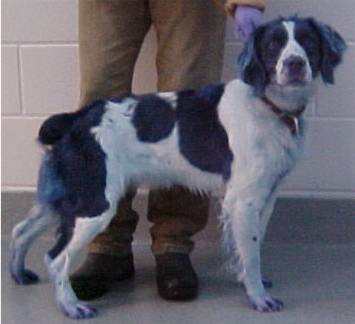

In [ ]:
cv2_imshow(img_1)

In [ ]:
# while we are training our neural network so all the images of the same size

In [ ]:
file_1=os.listdir("/content/train")
dog_count=0
cat_count=0

In [ ]:
for files in file_1:
  if files[0:3]=='dog':
    dog_count+=1
  else:
    cat_count+=1

In [ ]:
print(dog_count)
print(cat_count)

12500
12500


In [ ]:
!mkdir "image_data"
original="/content/train/"
resized="/content/image_data/"

In [ ]:
for i in range(2000):
  filename=os.listdir(original)[i]
  img_path=original + filename
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  new_image_path=resized+filename
  img.save(new_image_path)

In [ ]:
filenames_2=os.listdir("/content/image_data")

In [ ]:
print(filenames_2)

['dog.542.jpg', 'cat.7578.jpg', 'cat.6461.jpg', 'cat.1154.jpg', 'dog.3894.jpg', 'dog.6788.jpg', 'dog.5233.jpg', 'dog.11464.jpg', 'dog.10057.jpg', 'dog.6144.jpg', 'dog.6739.jpg', 'cat.10569.jpg', 'dog.5660.jpg', 'cat.6282.jpg', 'dog.4646.jpg', 'cat.4880.jpg', 'dog.11118.jpg', 'cat.2595.jpg', 'cat.4784.jpg', 'dog.8651.jpg', 'cat.7420.jpg', 'dog.7554.jpg', 'cat.11021.jpg', 'dog.4389.jpg', 'cat.3631.jpg', 'dog.4388.jpg', 'dog.2574.jpg', 'dog.10393.jpg', 'dog.10559.jpg', 'dog.11072.jpg', 'cat.534.jpg', 'cat.447.jpg', 'dog.5779.jpg', 'cat.12247.jpg', 'dog.11751.jpg', 'dog.11583.jpg', 'cat.9759.jpg', 'dog.3494.jpg', 'cat.6192.jpg', 'dog.3491.jpg', 'dog.4018.jpg', 'cat.2792.jpg', 'cat.2194.jpg', 'dog.6376.jpg', 'cat.11742.jpg', 'cat.8428.jpg', 'dog.12434.jpg', 'cat.8950.jpg', 'cat.1887.jpg', 'dog.10341.jpg', 'dog.7565.jpg', 'cat.3624.jpg', 'cat.4087.jpg', 'dog.11468.jpg', 'dog.5241.jpg', 'dog.3983.jpg', 'dog.10243.jpg', 'cat.1088.jpg', 'cat.11984.jpg', 'cat.320.jpg', 'cat.4814.jpg', 'dog.5045.

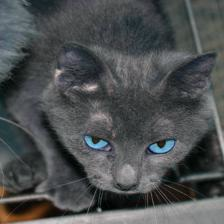

(224, 224, 3)


In [ ]:
a_1=mpimg.imread("/content/image_data/cat.6461.jpg")
cv2_imshow(a_1)
plt.show()
print(a_1.shape)

In [ ]:
# Creating labels for resized images of dogs and cat

In [ ]:
# dog=1
# cat=0

In [ ]:
filenames=os.listdir("/content/image_data")

In [ ]:
labels=[]

In [ ]:
for i in range(0,2000):
  if filenames[i][0:3]=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
one=0
zero=0
print(len(labels))
for i in labels:
  if i==1:
    one+=1
  else:
    zero+=1

print(one)
print(zero)



2000
1002
998


In [ ]:
import cv2
import glob
image_directory="/content/image_data/"
image_extension=['jpg','png']
files=[]
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]
dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[144 130 148]
   [137 125 143]
   [135 123 141]
   ...
   [ 88 103 105]
   [ 78  96  97]
   [ 81  99 100]]

  [[138 124 142]
   [138 126 144]
   [143 131 149]
   ...
   [ 89 102 104]
   [ 93 106 108]
   [ 89 102 104]]

  [[133 119 137]
   [140 128 146]
   [151 139 157]
   ...
   [ 85  93  93]
   [ 88  96  96]
   [ 89  97  97]]

  ...

  [[ 91  84 111]
   [ 89  83 108]
   [100  94 119]
   ...
   [134 132 154]
   [134 131 153]
   [140 137 159]]

  [[102  95 122]
   [ 96  90 115]
   [103  97 122]
   ...
   [120 118 140]
   [100  97 119]
   [104 101 123]]

  [[105  98 125]
   [ 82  76 101]
   [ 90  84 109]
   ...
   [ 79  77  99]
   [ 73  70  92]
   [113 110 132]]]


 [[[100 117 120]
   [102 119 122]
   [105 122 125]
   ...
   [135 135 123]
   [139 136 122]
   [138 135 121]]

  [[104 121 124]
   [105 122 125]
   [105 122 125]
   ...
   [136 136 124]
   [140 137 123]
   [139 136 122]]

  [[105 122 125]
   [105 122 125]
   [104 121 124]
   ...
   [138 138 126]
   [142 139 125]
   [141 138

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
X=dog_cat_images
y=labels

In [ ]:
#train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
# Building tyhe neural network

In [ ]:
import tensorflow as tf


In [ ]:
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [ ]:
pre_trained_model1=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [ ]:
import tensorflow as tf

num_of_classes = 2

# Load pretrained MobileNetV2 without top layer
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

# Functional API
inputs = tf.keras.Input(shape=(224, 224, 3))
x = pretrained_model(inputs, training=False)   # pass inputs through pretrained model
outputs = tf.keras.layers.Dense(num_of_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(y_train)

model.fit(X_train,y_train,epochs=5)



[0 0 1 ... 1 1 0]
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8252 - loss: 0.3875
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9746 - loss: 0.0854
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9805 - loss: 0.0645
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9770 - loss: 0.0572
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9843 - loss: 0.0516


In [ ]:
b=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step


In [ ]:
b1=np.argmax(b)

In [ ]:
print(type(b))


<class 'numpy.ndarray'>


In [ ]:
np.argmax(b)

np.int64(708)

In [ ]:
for i in b:
  print(i)

[9.9991184e-01 8.8084846e-05]
[9.9943936e-01 5.6054746e-04]
[0.02320415 0.9767958 ]
[0.00408286 0.995917  ]
[0.99849164 0.00150826]
[0.08629038 0.9137096 ]
[0.01055317 0.9894467 ]
[0.01963652 0.9803634 ]
[0.0020995 0.9979005]
[0.9655484 0.0344515]
[9.9909174e-01 9.0831495e-04]
[3.8717117e-04 9.9961287e-01]
[0.00671309 0.99328697]
[9.994122e-01 5.876919e-04]
[0.9979896  0.00201033]
[9.992907e-01 7.092404e-04]
[9.9994606e-01 5.3829262e-05]
[9.6871122e-04 9.9903125e-01]
[0.00762611 0.9923739 ]
[0.92677593 0.07322413]
[0.01372519 0.98627484]
[0.9907489  0.00925108]
[0.01969496 0.9803049 ]
[0.00769193 0.992308  ]
[9.993048e-01 6.953038e-04]
[0.6424932  0.35750675]
[0.0020488 0.9979512]
[4.5417994e-04 9.9954575e-01]
[0.9920594  0.00794059]
[9.9954838e-01 4.5162332e-04]
[0.9989903  0.00100958]
[0.00197427 0.99802566]
[0.03833726 0.9616627 ]
[0.00377213 0.9962278 ]
[9.998930e-01 1.069213e-04]
[0.99894685 0.00105321]
[8.9989699e-05 9.9990994e-01]
[9.9987221e-01 1.2777247e-04]
[9.9986935e-01 1.3

In [ ]:
l=[]
for i in b:
 a=np.argmax(i)
 l.append(a)

In [ ]:
print(l)

[np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc1=accuracy_score(y_test,l)

In [ ]:
print(acc1)

0.9725


Enter the path/content/dog_6.jpg


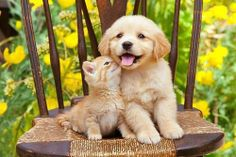

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Dog


In [ ]:
img_path=input("Enter the path")

input_img=cv2.imread(img_path)

cv2_imshow(input_img)


input_img=cv2.resize(input_img,(224,224))
input_img=input_img/255
input_img=np.reshape(input_img,(1,224,224,3))


input_prediction=model.predict(input_img)
input_label=np.argmax(input_prediction)
if input_label==1:
  print("Dog")
else:
  print("Cat")

In [ ]:
import pickle
pickle.dump(model,open("model.pkl",'wb'))